In [1]:
# import necessary libraries for exploratory data analysis
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# grab the data for multiple stocks
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [3]:
# display the basic information of the dataset
print(data.info())
print()
print(data.head())
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   GOOGL   756 non-null    float64
 3   MSFT    756 non-null    float64
dtypes: float64(4)
memory usage: 29.5 KB
None

                 AAPL       AMZN      GOOGL        MSFT
Date                                                   
2020-01-02  73.249031  94.900497  68.433998  155.093674
2020-01-03  72.536896  93.748497  68.075996  153.162476
2020-01-06  73.114883  95.143997  69.890503  153.558365
2020-01-07  72.771011  95.343002  69.755501  152.158264
2020-01-08  73.941635  94.598503  70.251999  154.581924

             AAPL        AMZN       GOOGL        MSFT
count  756.000000  756.000000  756.000000  756.000000
mean   128.737156  142.455482  104.257655  241.134462
std     30.684615   27.856019   26.472870   47.807404

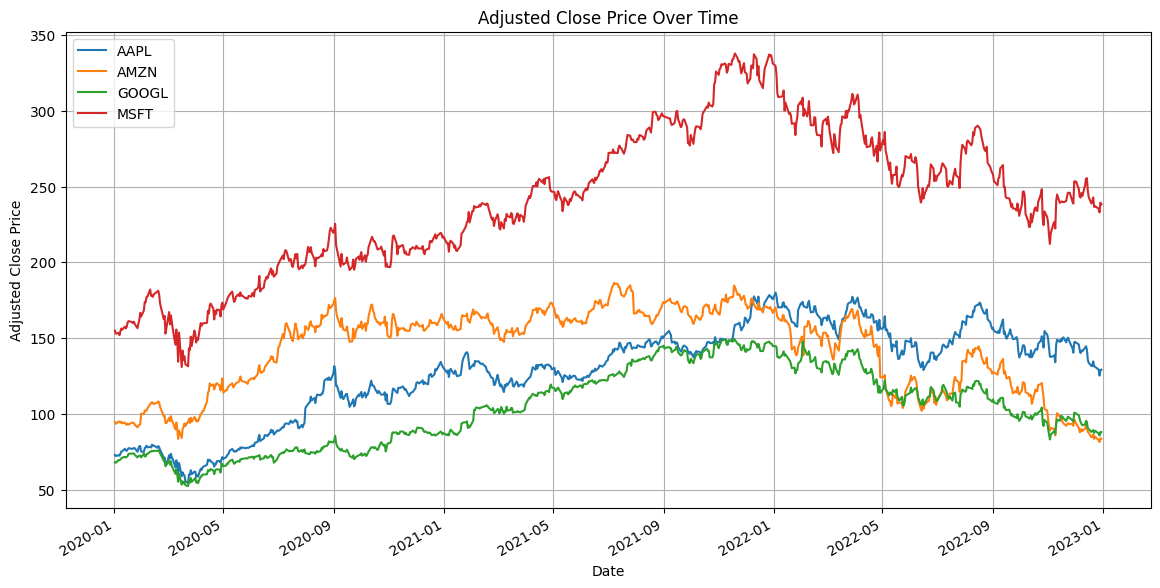

In [4]:
# plot the stock prices

data.plot(figsize=(14, 7))
plt.title('Adjusted Close Price Over Time')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

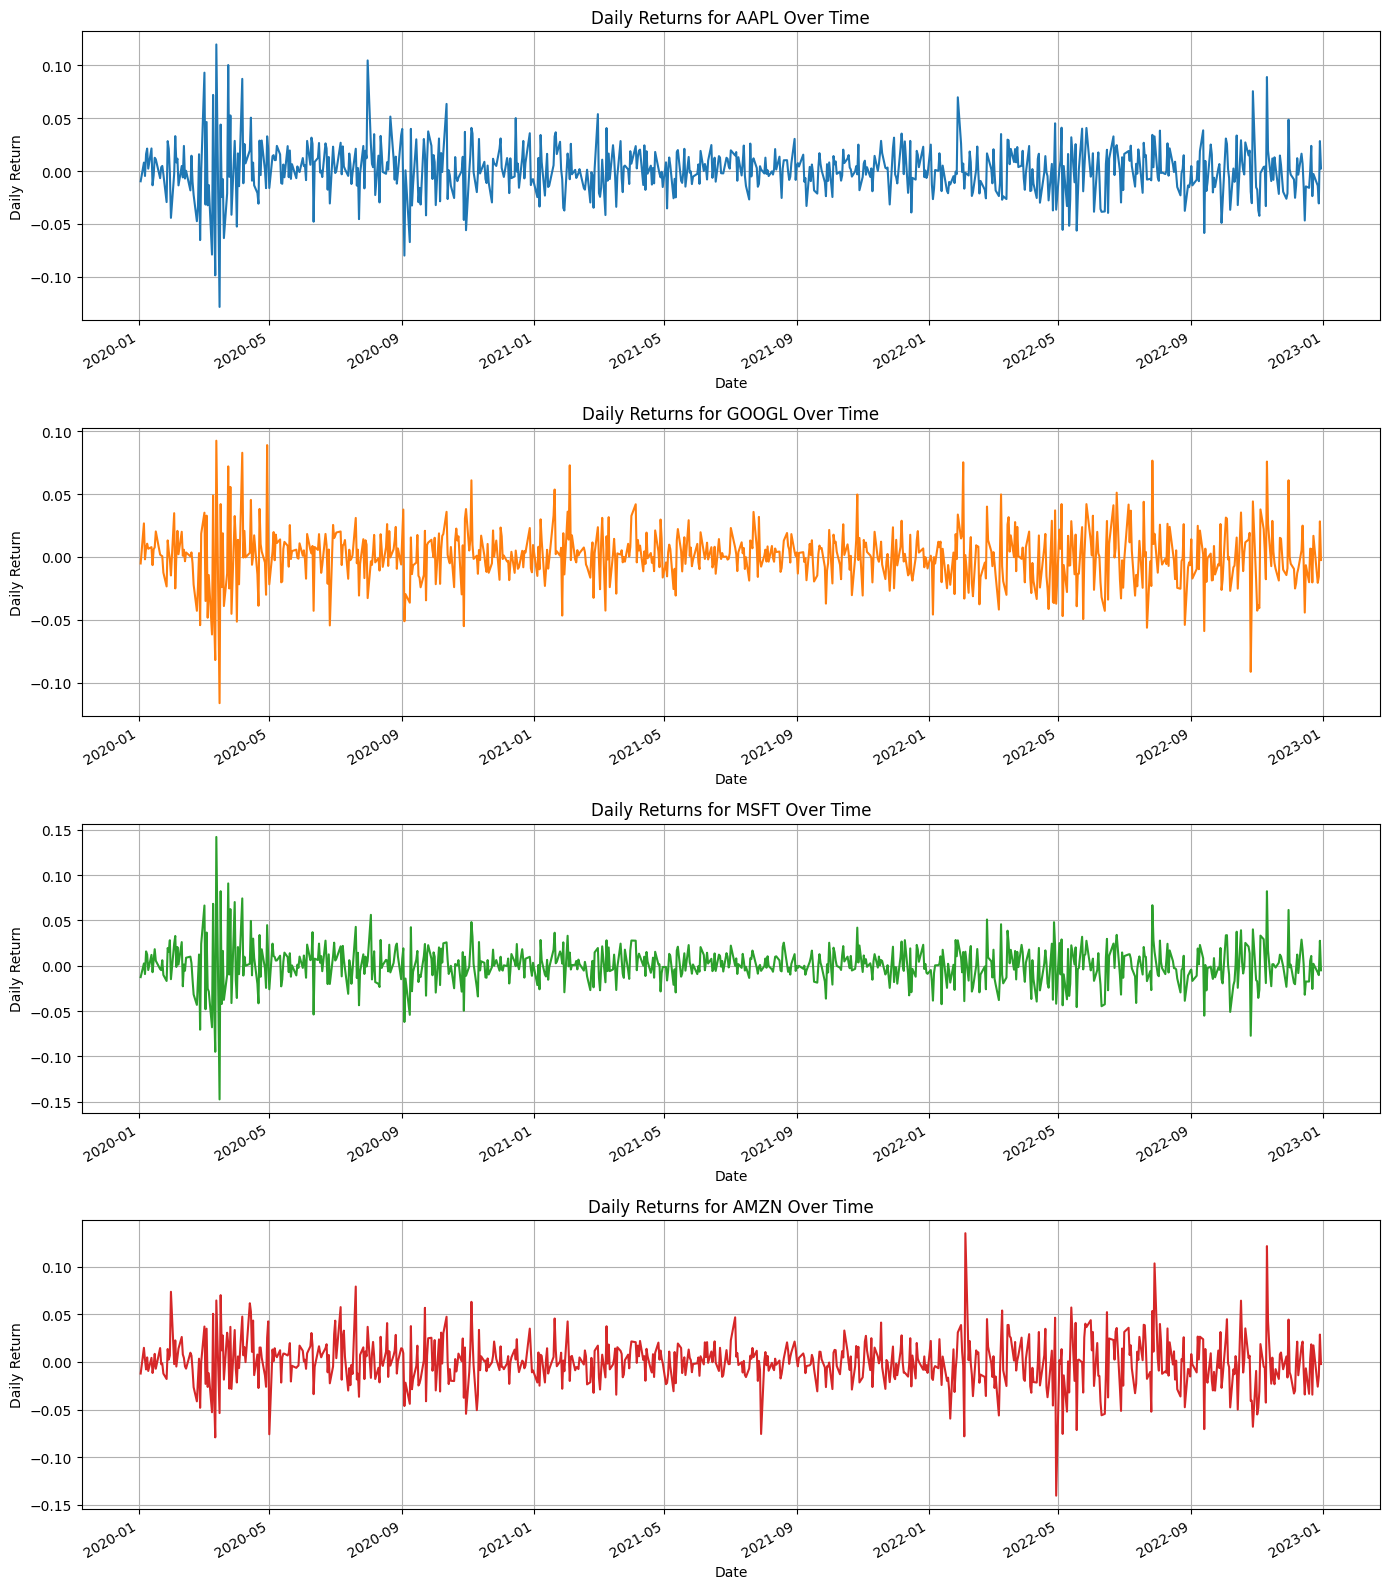

In [5]:
# compute and graph the daily returns of each stock
daily_returns = data.pct_change()

# plot the daily returns
colors = sns.color_palette('tab10', len(tickers))
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(14, 4*len(tickers)))

for i, ticker in enumerate(tickers):
    daily_returns[ticker].plot(ax=axes[i], color=colors[i])
    axes[i].set_title(f'Daily Returns for {ticker} Over Time')
    axes[i].set_ylabel('Daily Return')
    axes[i].set_xlabel('Date')
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()

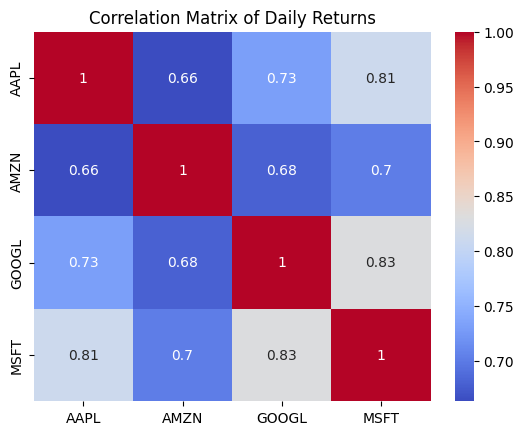

In [6]:
# calculate the correlation between the different stocks
correlations = daily_returns.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

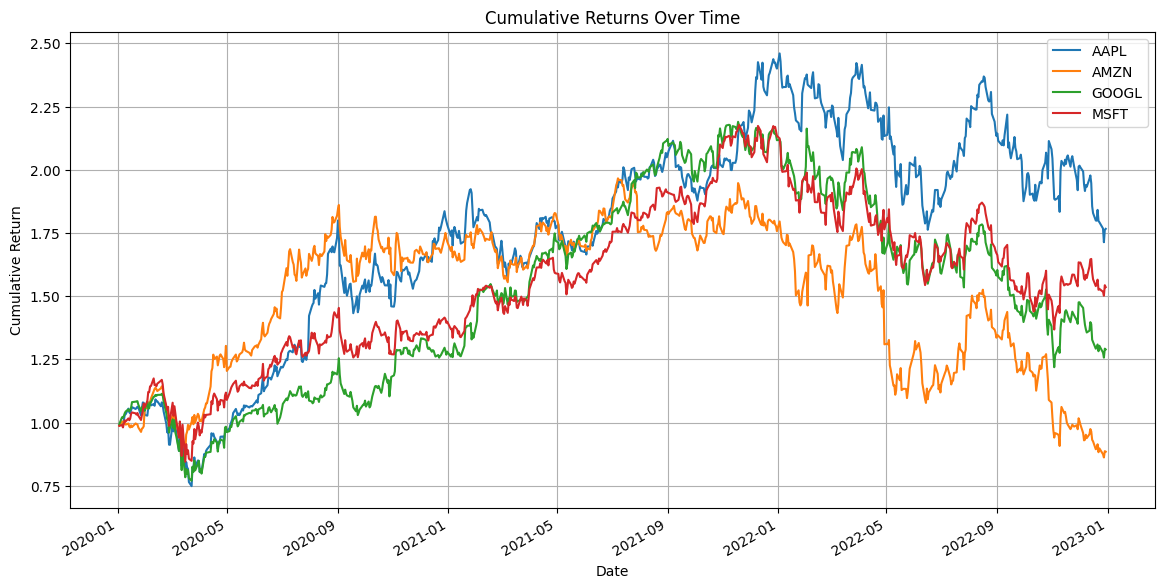

In [7]:
# generate cumulative return plot
cumulative_returns = (daily_returns + 1).cumprod()
cumulative_returns.plot(figsize=(14, 7))
plt.title('Cumulative Returns Over Time')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()